Results for GB_F2train_swellhr_RS-10kf:
Fold 1: Accuracy = 0.71238
Fold 2: Accuracy = 0.71445
Fold 3: Accuracy = 0.71291
Fold 4: Accuracy = 0.71065
Fold 5: Accuracy = 0.71260
Fold 6: Accuracy = 0.71776
Fold 7: Accuracy = 0.71272
Fold 8: Accuracy = 0.71597
Fold 9: Accuracy = 0.71410
Fold 10: Accuracy = 0.71095
Results for LR_F2train_swellhr_RS-10kf:
Fold 1: Accuracy = 0.42773
Fold 2: Accuracy = 0.42475
Fold 3: Accuracy = 0.42925
Fold 4: Accuracy = 0.42558
Fold 5: Accuracy = 0.42399
Fold 6: Accuracy = 0.42490
Fold 7: Accuracy = 0.42226
Fold 8: Accuracy = 0.42406
Fold 9: Accuracy = 0.42143
Fold 10: Accuracy = 0.42215
Results for CB_F2train_swellhr_RS-10kf:
Fold 1: Accuracy = 0.61115
Fold 2: Accuracy = 0.60455
Fold 3: Accuracy = 0.60570
Fold 4: Accuracy = 0.60383
Fold 5: Accuracy = 0.60888
Fold 6: Accuracy = 0.60990
Fold 7: Accuracy = 0.60674
Fold 8: Accuracy = 0.60643
Fold 9: Accuracy = 0.60378
Fold 10: Accuracy = 0.60529
Results for KNN_F2train_swellhr_RS-10kf:
Fold 1: Accuracy = 0.72987

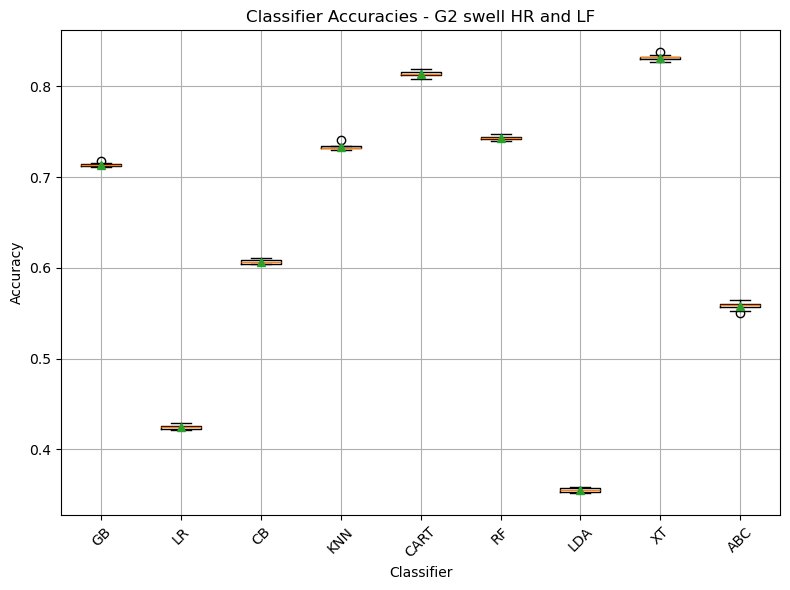

In [6]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)


results_directory = '/Users/samson/Documents/Final2/swell/resultshrlf2'
classifier_files = [f for f in os.listdir(results_directory) if '_F2train_swellhr_RS-10kf' in f]

best_classifier_name = None
best_accuracy = -np.inf
all_accuracies = {}

for file in classifier_files:
    clf_name = file.replace('_F2train_swellhr_RS-10kf.pkl', '')
    clf_results = load_obj(os.path.join(results_directory, file))
    
    # Extract K-fold accuracies
    cv_results = clf_results['cv_results']
    accuracies = [cv_results[f'split{i}_test_score'][clf_results['cv_results']['rank_test_score'].argmin()] for i in range(10)]
    all_accuracies[clf_name] = accuracies
    
    # Summarize results
    print(f"Results for {clf_name}:")
    for i, acc in enumerate(accuracies):
        print(f"Fold {i+1}: Accuracy = {acc:.5f}")
    
    # Update best classifier if applicable
    mean_accuracy = np.mean(accuracies)
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_classifier_name = clf_name

print(f"\nBest Classifier: {best_classifier_name} with K-Fold Mean Accuracy: {best_accuracy:.5f}")

# Original dictionary: all_accuracies
# New dictionary with trimmed names: trimmed_accuracies
trimmed_accuracies = {name.split('_')[0]: accuracies for name, accuracies in all_accuracies.items()}

# Now create the boxplot using trimmed_accuracies
plt.figure(figsize=(8, 6))
plt.boxplot(trimmed_accuracies.values(), labels=trimmed_accuracies.keys(), showmeans=True)
plt.title('Classifier Accuracies - G2 swell HR and LF')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


